<a href="https://colab.research.google.com/github/Tetratic/MLA_BSJ/blob/main/MLA5_BSJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Assignment 5
### Brian Johnston
### CS430-ON
### Machine Learning in the Cloud

# General Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Imports for Specific Modules

In [31]:
from sklearn.model_selection import train_test_split as tts
from sklearn.pipeline import Pipeline as plne
from sklearn.compose import ColumnTransformer as ctrans
from sklearn.preprocessing import MinMaxScaler as mmscal
from sklearn.preprocessing import OneHotEncoder as ohe

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#Acquire Data

In [13]:
landsat_train = pd.read_csv('/content/gdrive/MyDrive/MLA_Data/landsat_train.csv')
landsat_test = pd.read_csv('/content/gdrive/MyDrive/MLA_Data/landsat_test.csv')

# Statistics and Visual Exploration

<Axes: xlabel='land_type'>

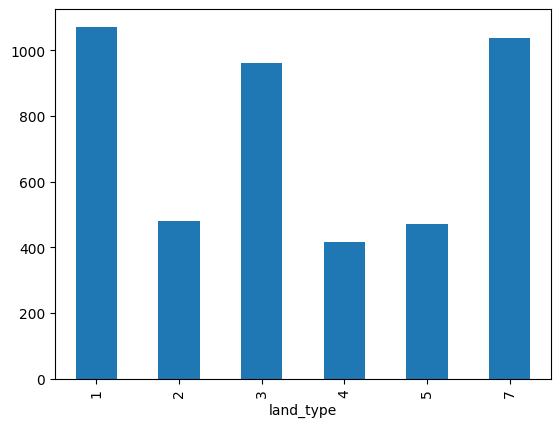

In [11]:
land_types_train = pd.Series(landsat_train['land_type'].groupby(landsat_train['land_type']).count())
land_types_train.plot(kind='bar')

<Axes: xlabel='land_type'>

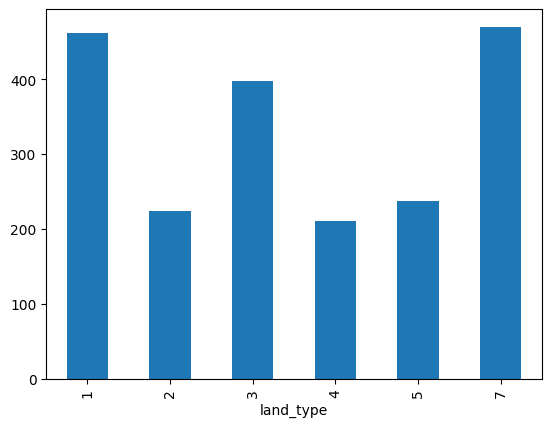

In [14]:
land_types_test = pd.Series(landsat_test['land_type'].groupby(landsat_test['land_type']).count())
land_types_test.plot(kind='bar')

# Splitting Data into Train/Test

In [17]:
X_train = landsat_train
X_train = X_train.drop(columns=['land_type'])
X_test = landsat_test
X_test = X_test.drop(columns=['land_type'])

In [18]:
y_train = landsat_train['land_type']
y_test = landsat_test['land_type']

# Building the Pipeline

In [21]:
nums = X_train.columns
cats = ['land_type']

In [23]:
col_trans = ctrans(transformers=[('num',mmscal(),nums)], remainder='passthrough')

In [37]:
pipeline = plne([('transform',col_trans),('RandomForestClassifier',RandomForestClassifier())])

In [38]:
from sklearn import set_config
set_config(display='diagram')
pipeline

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middl...
       'middle_right_r', 'middle_right_g', 'middle_right_infra1',
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('RandomForestClassifier', RandomForestClassifier())])

# Executing the Model

In [26]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middl...
       'middle_right_r', 'middle_right_g', 'middle_right_infra1',
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('SVC', RandomForestClassifier())])

# Evaluating the Model

In [27]:
y_pred = pipeline.predict(X_test)

In [36]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           1       0.98      0.99      0.99       461\n           2       0.98      0.98      0.98       224\n           3       0.88      0.94      0.91       397\n           4       0.77      0.64      0.69       211\n           5       0.93      0.89      0.91       237\n           7       0.88      0.90      0.89       470\n\n    accuracy                           0.91      2000\n   macro avg       0.90      0.89      0.89      2000\nweighted avg       0.91      0.91      0.91      2000\n'

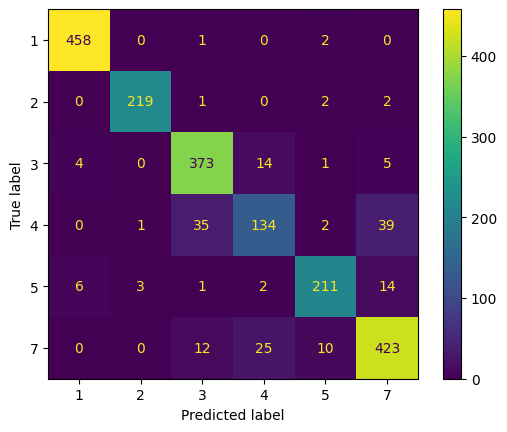

In [30]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

These results indicate that our model is very good. most results uended up in the correct places in the confusion matrix, and our precision, recall andF1 scores are all quite high, with F1 being approximately 91%. The results of course could be better, but they are generally quite good, indicating the strength of our model.

# Conclusion
This model is a good fit for our model, but it is certainly not the best. With an F1 score of around 91%, there is definitely room for improvement. It is generally reliable, but does seem to struggle to identify between land types 3 and 4, as well as correctly identify type 7 land.

#Acquire Data

Data Acquired in Problem 1

# Splitting Data into Train/Test

Data split in Problem 1

# Building the Pipeline

In [46]:
pipeline = plne([('transform',col_trans),('BaggingClassifier',BaggingClassifier(RandomForestClassifier()))])

In [47]:
from sklearn import set_config
set_config(display='diagram')
pipeline

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middl...
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('BaggingClassifier',
                 BaggingClassifier(estimator=RandomForestClassifier()))])

# Executing the Model

In [48]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middl...
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('BaggingClassifier',
                 BaggingClassifier(estimator=RandomForestClassifier()))])

# Evaluating the Model

In [49]:
y_pred = pipeline.predict(X_test)

In [50]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           1       0.98      0.99      0.98       461\n           2       0.98      0.98      0.98       224\n           3       0.88      0.95      0.92       397\n           4       0.75      0.61      0.67       211\n           5       0.92      0.88      0.90       237\n           7       0.86      0.89      0.87       470\n\n    accuracy                           0.90      2000\n   macro avg       0.90      0.88      0.89      2000\nweighted avg       0.90      0.90      0.90      2000\n'

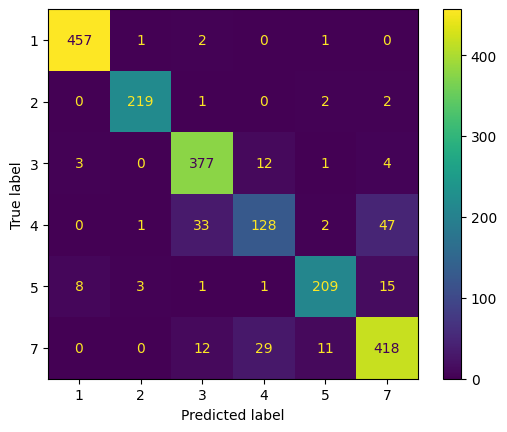

In [51]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

The result above indicates that this model is quite good, with an F1 score of approximately 92%. This is slightly better than the previous model, and it seems to struggle in similar places, which makes sense due to the nature of Bagging.

# Conclusion
Overall, this model seems to be more accurate than before, better placing more land types, but still struggling to place the majority of the same kinds of issues as were seen in the original model. This model would be a better model to use, but comes at the cost of taking more time to process and predict.

# Acquire Data


In [61]:
df = pd.read_csv('/content/gdrive/MyDrive/MLA_Data/banknote_authentication.csv')

# Statistics and Visual Exploraiton

This was done in a previous MLA

# Splitting the Data into Train/Test

In [62]:
X=df
X=X.drop(columns=['forgery'])

In [63]:
y=df['forgery']

In [64]:
X_train,X_test,y_train,y_test = tts(X,y,test_size=.2,random_state=0)

# Building the Pipeline

In [65]:
nums = ['variance','skewness','curtosis','entropy']
cats = ['forgery']

In [66]:
col_trans = ctrans(transformers=[('num',mmscal(),nums)], remainder='passthrough')

In [67]:
pipeline = plne([('transform',col_trans),('RandomForestClassifier',RandomForestClassifier())])

In [68]:
from sklearn import set_config
set_config(display='diagram')
pipeline

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('RandomForestClassifier', RandomForestClassifier())])

# Executing the Model

In [69]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('RandomForestClassifier', RandomForestClassifier())])

# Evaluating the Model

In [70]:
y_pred = pipeline.predict(X_test)

In [71]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99       157\n           1       0.98      0.99      0.99       118\n\n    accuracy                           0.99       275\n   macro avg       0.99      0.99      0.99       275\nweighted avg       0.99      0.99      0.99       275\n'

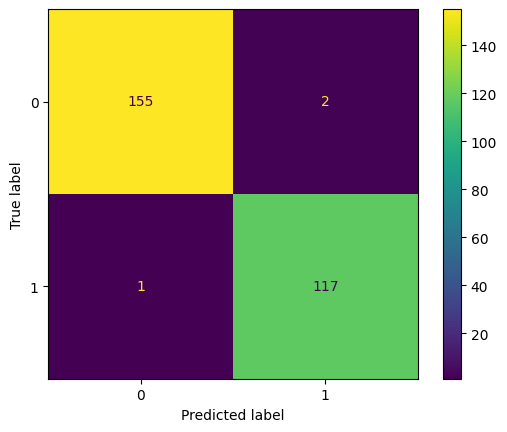

In [72]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

The above results indicate a very very good model. This model has approximately 99% accuracy, and has an incredibly good record, with only 3 incorrect predictions for the data.

# Conclusion

This model is very accurate for predicting forgeries, within our training data, it has a ~99% F1 score, and only 3 failures, making it nearly perfect. This simply means that the model is very accurate at predicting forgeries and does not have issues with falso positives or false negatives either.